# *Исследование закономерностей определяющих успешность игры*

**Цель** 
* Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Исследование поможет в планировании рекламной компании на 2017 год.

## Изучение данных из файла

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# чтение файла с данными и сохранение в data
data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Общая информация о датасете
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Согласно документации к данным:

* `Name` — название игры 
* `Platform` — платформа 
* `Year_of_Release` — год выпуска 
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий) 
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий) 
* `Other_sales` — продажи в других странах (миллионы проданных копий) 
* `Critic_Score` — оценка критиков (максимум 100)
* `user_Score` — оценка пользователей (максимум 10)
* `Rting` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В названиях колонок видно нарушения стиля:
* Строчные буквы сочитаются с прописными

Необходимо преобразовать данные к нужным типам:
* `Year_of_Release` к типу int, так как год не может быть дробным
* `user_Score` к типу данных int, так как оценка пользователя варьируется от 0 до 10

In [5]:
# приведем название колонок к нижнему регистру
column = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']
# columns_lower = [i.lower() for i in column]
# data = data.rename(columns= dict(zip(column, columns_lower)))
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# находим количество пропущенных значений в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Большое количество пропусков в колонках `critic_score`, `user_score`, `rating`

In [7]:
# уникальные значения клонки rating
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Где буквенные значения обозначают:
* EC» («Early childhood») — «Для детей младшего возраста» 
* «E» («Everyone») — «Для всех» = "K-A" ("Kids to Adults")
* E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»


In [8]:
# уникальные значения колонки user_score
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение tbd означает “to be announced” and “to be determined”, тоесть оценка данной игре еще не объявлена.

In [9]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Сток со значением колонки `user_score` 'tbd' - 2424. Довольно много. Заменить tbd на какое-либо значение мы не можем.

In [10]:
# уникальные значения колонки genre
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
# Проверка дубликатов 
data.duplicated().sum()

0

## Вывод: 
   1. Нарушение стиля в названиях колонки было исправлено. Название колонок было приведено к нижнему регистру.
   2. Оценено количество пропусков в колонках `critic_score` - 8578, `user_score` - 6701, `rating`- 6766, `year_of_release`- 269.
   3. Даны пояснения значениям находящися в колонке `rating` и значению tbd в колонке  `user_score`
   4. Явных дубликатов в исходных данных нет.

# Предобработка данных

## Заполнение пропусков

* Заменить пропуски в колонке name мы может только на unknown, так как сложно сказать какой именно игре соответствуют данные.

In [12]:
# пропуски в колонке name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# заменим пропуски в колонке name на 'unknown'
data['name'] = data['name'].fillna('unknown')

* Для игр, которых не известно название, не известен и жанр, поэтому заменим пропуски в колонке genre на unknown.

In [14]:
data.query('platform == "GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,"1,992.00",Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,"1,991.00",Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,"1,992.00",Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,"1,990.00",Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,unknown,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,"1,992.00",Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,"1,994.00",Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,"1,994.00",Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,"1,992.00",Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,"1,994.00",Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


In [15]:
# удалим колонки с пропусками в названии игры
data = data.dropna(subset=['name'])
data[data.name.isna()].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [16]:
# заменим пропуски в колонке genre на 'unknown'
data['genre'] = data['genre'].fillna('unknown')

* Название одной и той же игры встречается несколько раз, так как игра выпускалась на разных платформах. Предположим, что одна и таже игра на разных платформах выходила в один и тот же год, тогда мы сможем заполнить пропуски такого рода. Оставшиеся пропуски заполним значением -1. Данное значение резко отличается от других значений в колонке, но позволит нам привести к нужному типу данных (int) и работать с этой колонкой дальше.

In [17]:
# пропуски в колонке year_of_release
data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
data.query('name == "Inversion"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12146,Inversion,PS3,"2,012.00",Shooter,0.03,0.03,0.00,0.01,56.00,5.4,M
12678,Inversion,X360,"2,012.00",Shooter,0.03,0.02,0.00,0.01,53.00,6.5,M
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M


In [19]:
data.query('name == "Virtua Quest"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15754,Virtua Quest,PS2,NaN,Role-Playing,0.01,0.01,0.00,0.00,53.00,7.6,T
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.00,55.00,5.5,T


In [20]:
# всего уникальных значений в name
len(data['name'].unique())

11560

In [21]:
# удалим пропуски в колонке year_of_release
data = data.dropna(subset = ['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Пропуски в колонке `user_score`  Примем, что скорее всего оценка пользователей конкретной игры не сильно отличается от платформы к платформе. Заполним возможные пропуски средней оценкой по игре, вычисленной по тем платформам по которым имеются данные для этой игры. Остальные пропуски заполнить -1 мы не можем, так как при вычислении средней оценки это повлияет на результат. В данной колонке есть значение tbd, его заменить на определенную оценку мы так же не можем, однако, что бы привести клонку к типу float и работать с ней дальше, мы можем заменить tbd на Nan.

Похожая ситуация с пропусками в колонке `critic_score`. Возможные значения Nan заполним средней оценкой для этой игры исходя из данных для других платформ.

In [22]:
# заменяем значение tdb на nan
data.loc[data.loc[:,'user_score'] == 'tbd','user_score'] = np.nan

* Для дальнейшей замены пропусков, необходимо привести данные к нужному типу

## Преобразование данных в нужные типы

После замены возможных пропусков, можно привести к необходимому типу данных колонки `year_of_release` и `user_score`.

In [23]:
try:
    data['year_of_release'] = data['year_of_release'].astype('int')
    data['user_score'] = data['user_score'].astype('float')
    data['critic_score'] = data['critic_score'].astypetupe('float')
except:
     print('Возникла ошибка с приведением типов')
data.info()

Возникла ошибка с приведением типов
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


* Продолжаем заполнять пропуски в колонках `user_score` и `critic_score`

In [24]:
# заменяем возможные пропуски в колонке `user_score` на среднее значение
data['user_score'] = (data['user_score']
                              .fillna(data.groupby('name')['user_score']
                                      .transform('mean')))
data['user_score'].isna().sum()

7922

In [25]:
# проверяем уникальные значения в колонке, на отсутствие tbd
data['user_score'].unique()

array([8.        ,        nan, 8.3       , 8.5       , 6.6       ,
       8.4       , 8.6       , 7.7       , 6.3       , 7.4       ,
       8.2       , 9.        , 7.9       , 8.1       , 8.7       ,
       7.1       , 3.4       , 5.3       , 4.8       , 3.2       ,
       8.9       , 6.4       , 7.8       , 7.5       , 2.6       ,
       7.2       , 9.2       , 7.        , 7.3       , 4.3       ,
       7.6       , 5.7       , 5.        , 9.1       , 6.5       ,
       4.65      , 8.8       , 6.9       , 9.4       , 6.8       ,
       6.1       , 6.7       , 5.4       , 4.        , 4.25      ,
       4.9       , 4.5       , 9.3       , 6.2       , 4.2       ,
       8.475     , 6.        , 3.7       , 4.1       , 5.8       ,
       5.6       , 5.5       , 4.4       , 4.6       , 5.9       ,
       3.9       , 4.15      , 8.37777778, 8.16666667, 3.1       ,
       6.875     , 2.9       , 8.56666667, 5.2       , 6.25      ,
       7.35      , 7.575     , 3.3       , 2.2       , 4.7    

In [26]:
# заполнение возможных пропусков в колонке critic_score
data['critic_score'] = (data['critic_score']
                              .fillna(data.groupby('name')['critic_score']
                                      .transform('mean')))
data['critic_score'].isna().sum()

7524

## Замена пропусков в колонке rating

In [27]:
rating = ["E", "M", "T", "E10+", "K-A", "AO", "EC", "RP"]
for i in rating:
    frequency = data[data.rating == i]['rating'].count()
    result = (frequency/9949)
    print(f'Частота встречаемости {i} {result:.2%}')

Частота встречаемости E 39.41%
Частота встречаемости M 15.44%
Частота встречаемости T 29.20%
Частота встречаемости E10+ 14.00%
Частота встречаемости K-A 0.03%
Частота встречаемости AO 0.01%
Частота встречаемости EC 0.08%
Частота встречаемости RP 0.01%


Наиболее встречаемый рейтинг игр это Е, то есть для всех. Затем T (для подростков) и M (для взрослых). Около 1,8% пропусков. Пропуски в колонке rating можно заменить на unknown

In [28]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].isna().sum()

0

## Создаем колонку с общими продажами игры

In [29]:
data['general_sales'] =(data['na_sales'] + 
                        data['eu_sales'] + 
                        data['jp_sales'] + 
                        data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Вывод:
* Пропуски в колонке `name` удалены, а в `genre` заполнены на unknown.
* Значение tbd в колонке `user_score` заполнены на Nan, что бы можно было привести данные к типу float.
* Пропуски в колонке `year_of_release` удалены.
* Пропуски в колонке `critic_score` заполнили средней оценкой для игр, для которых были данные по другим платформам, остальные пропуски заполнить не предоставляется возможным. 
* Замена пропусков в колонке  `rating` на значение самого распространненного рейтинга среди игр Е.

# Исследовательский анализ данных

## Количество выпущенных игр по годам

Посмотрим сколько игр выпускалось в разные года. Мы знаем, что в колонке `name` повторяющиеся названия игр (для разных платформ) то будем считать, что нас интересует выпуск именно игры, неважно на какой платформе. Для этого создадим новый датафрейм только с уникальными названиями игр и посчитаем количество выпущенных игр по годам.

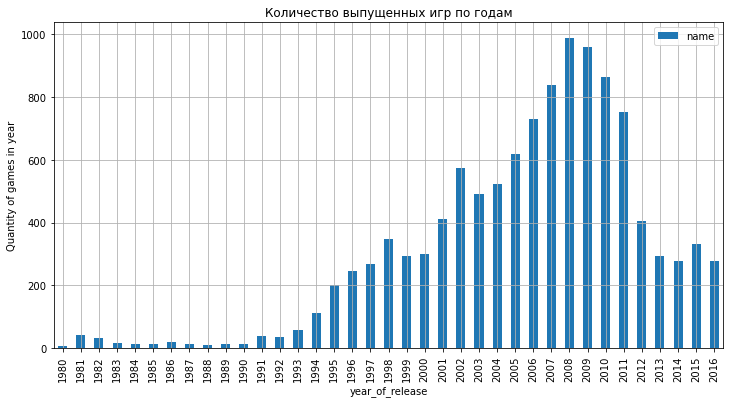

In [37]:
data_name_unique = data.drop_duplicates(subset='name').copy()
ax = (
    data_name_unique
    .pivot_table(index='year_of_release', values = 'name', aggfunc='count')
    .plot.bar(grid=True, figsize=(12,6), title = 'Количество выпущенных игр по годам')    
)
plt.ylabel('Quantity of games in year');

Пик по количеству выпущенных игр приходится на 2008 год. С 2012 года выпуск игр резко умешьшился. Данные за все периоды позволяют смотреть общую тенденцию количества выпущенных компьютерных игр. Общая тенденция позволяет понять как внешние факторы могли отразится на выпуске компьютерных игр.

## Изменение продаж по платформам

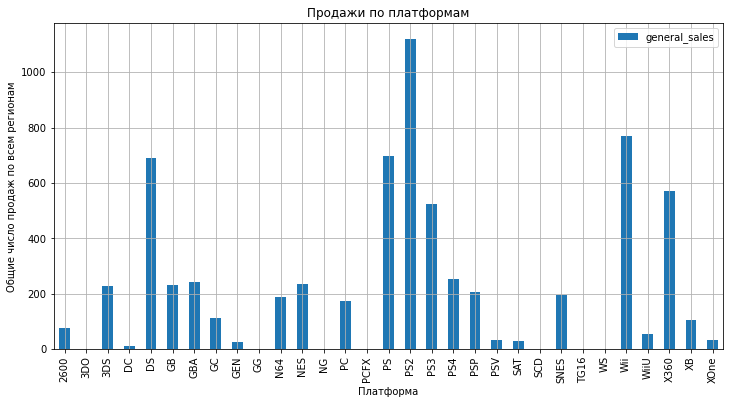

In [38]:
ax = (
     data_name_unique
    .pivot_table(index='platform', values = 'general_sales', aggfunc='sum')
    .plot.bar(grid=True, figsize=(12,6), title='Продажи по платформам')
)
ax.set_xlabel('Платформа');
ax.set_ylabel('Общие число продаж по всем регионам');

Больше всего продаж пришлось на платформы PS2, PS, PS3, DC, Wii, X360. 

In [39]:
# Выберем платформы с наибольшими суммарными продажами
data_platform_sales = (
    data
    .pivot_table(index='platform' , values = 'general_sales', aggfunc='sum')
    .sort_values(by='general_sales', ascending=False)
).copy()
data_platform_sales

,general_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


* Выберем платформы для которых суммарные продажи составляют более 700 млн. 
* Для выбранных платформ определим характерный срок их жизни.

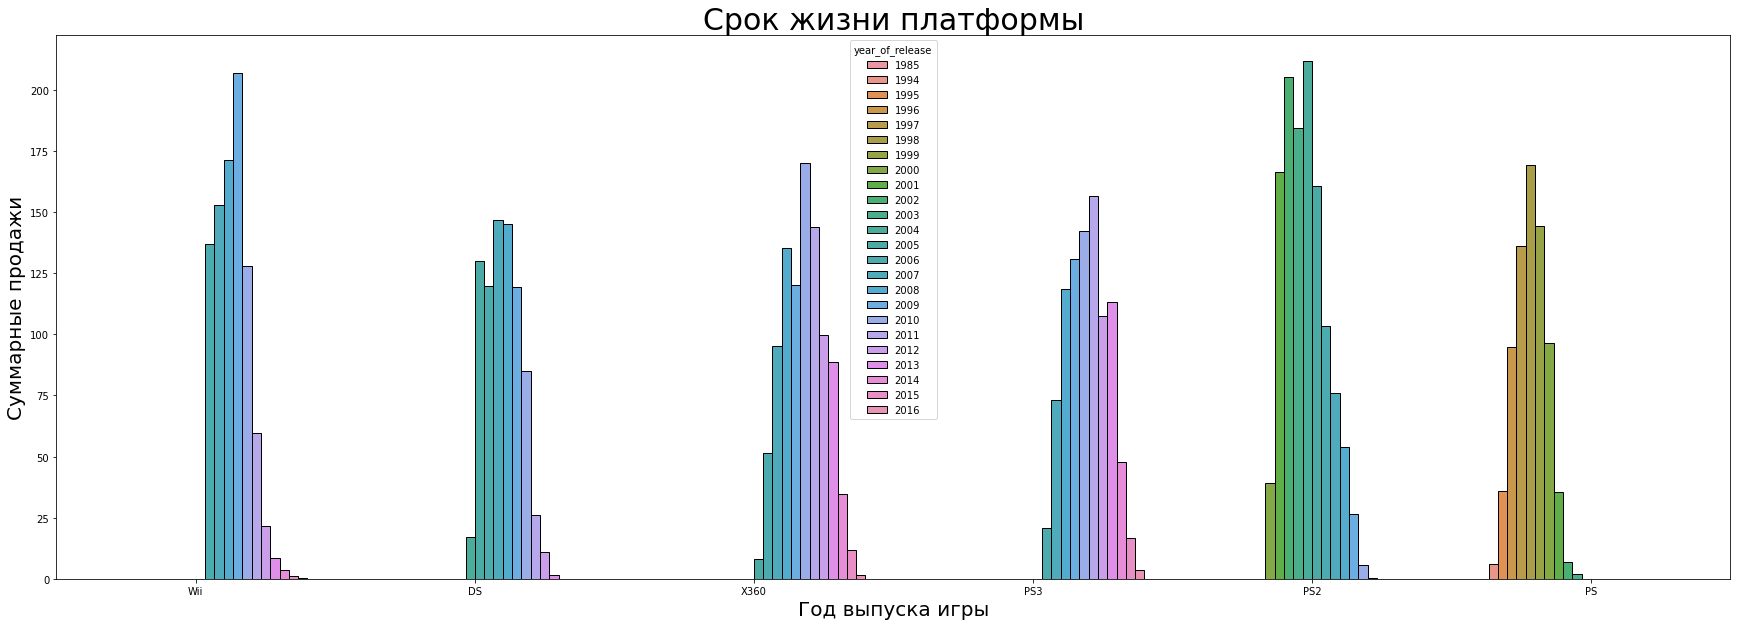

Количество лет от появления платформы и до полного исчезновения - 13.166666666666666


In [40]:
platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] 
fig = plt.figure(figsize=(30, 10))
sns.barplot(x='platform', y ='general_sales', hue='year_of_release',
           estimator= np.sum,
           data=data.query('platform == @platform & year_of_release != -1'),ci=0, ec='black')
plt.title('Срок жизни платформы', fontsize = 30)
plt.xlabel('Год выпуска игры', fontsize = 20)
plt.ylabel('Суммарные продажи', fontsize = 20)
plt.show()
year=[]
for i in platform:
    d = data[
        (data['platform'] == i) 
        & (data.year_of_release > -1)
    ].pivot_table(
        index='year_of_release', 
        values = 'general_sales', 
        aggfunc='sum'
    )
    year.append(max(d.index.tolist())-min(d.index.tolist()))
year_mean = sum(year)/len(year)
print(f'Количество лет от появления платформы и до полного исчезновения - {year_mean}')

Однако в среднем от пика популярности платформы и до снижения ее продаж проходит 8 лет. Исходя из этих данных актуальным периодом будем читать 2011-2016 года

In [41]:
# Выбираем данные за актуальный период
data_actually = data.query('2011 <= year_of_release <= 2016').copy()

In [42]:
# Найдем наиболее популярные платформы по суммарным продажам за актуальный промежуток времени
data_actually_platform = data_actually.pivot_table(
    index='platform',
    values='general_sales',
    aggfunc='sum').sort_values(by='general_sales', ascending=False).copy()
data_actually_platform

,general_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


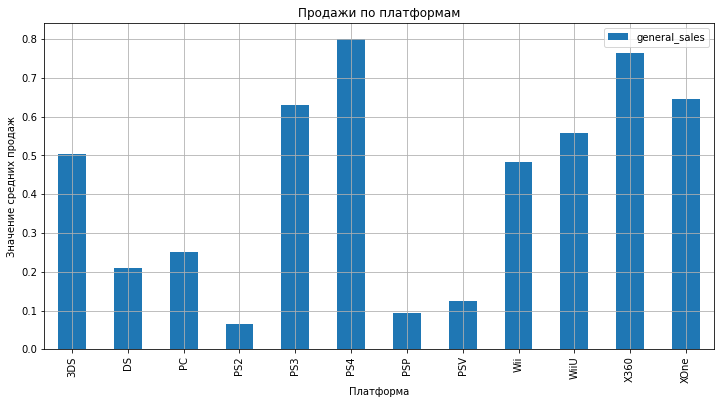

In [43]:
ax = data_actually.pivot_table(
    index='platform',
    values='general_sales',
    aggfunc='mean').plot.bar(grid=True, figsize=(12,6), title='Продажи по платформам')
ax.set_xlabel('Платформа');
ax.set_ylabel('Значение средних продаж');

Выберем все платформы, за исключением PS2, так как для мало данных(всего одна строка). Рассматривает почти все платформы, так как какая-то платформа могла выйти на рынок относительно недавно и для таких платформ глобальные продажи будут ниже, чем для платформ, которые на рынке уже давно. Платформы, которые появились на рынке недавно, могут оказать более перспективными в будущем. По средним продажам ледируют платформы PS4, X360, PS3, XOne, WiiU.

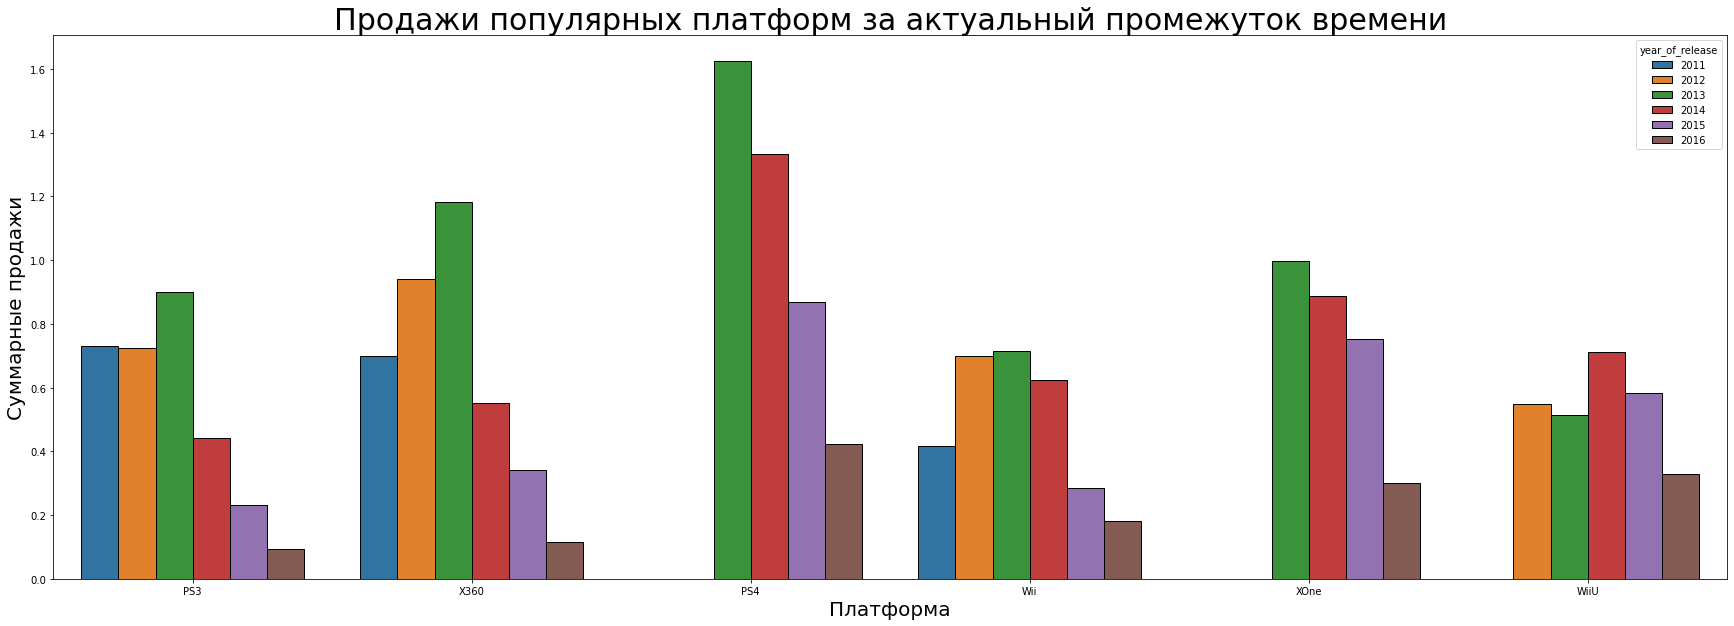

In [44]:
platform = ['PS4', 'X360', 'PS3', 'XOne', 'WiiU', 'Wii']

fig = plt.figure(figsize=(30, 10))
sns.barplot(x='platform', y ='general_sales', hue='year_of_release',
           data=data_actually.query('platform == @platform'),ci=0, ec='black')
plt.title('Продажи популярных платформ за актуальный промежуток времени', fontsize = 30)
plt.xlabel('Платформа', fontsize = 20)
plt.ylabel('Суммарные продажи', fontsize = 20)
plt.show()

У всех платформ наблюдается тенденция к уменьшению общих продаж к 2016 году. Наиболее прибыльной к 2016 году является платформа  PS4, для нее в 2016 году общие продажи составили больше, чем для остальных платформ. Если считать, что время полной жизни платформы 14 лет, а пик ее пупулярнойсти приходит на 5 лет, то самой перспективными будут платформа PS4, XOne, WiiU  для них высокие продажи к 2016 году и на рынок они вышли недавно 4-5 лет назад.

* **Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.** 

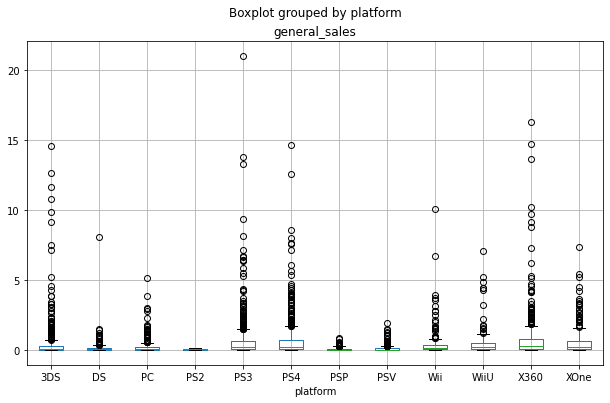

In [45]:
data_actually.boxplot(
    by='platform', 
    column='general_sales',
    figsize=(10, 6)
);


Наблюдаем большое количество выбросов. Случаи суммарных продаж копий превышающих 5 млн довольно редки. Для платформ XB и DC за актуальный переод доступно только одно значение, поэтому график для него выглядит таким образом.

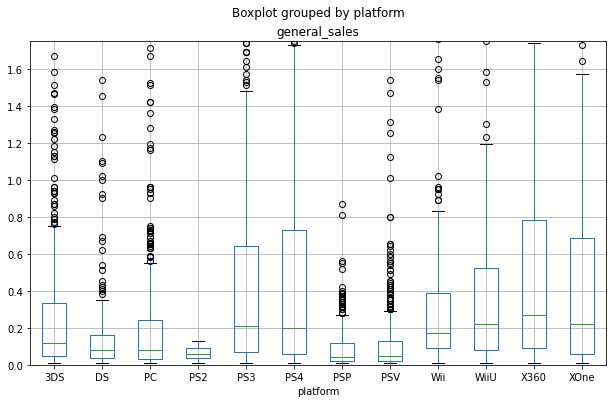

In [48]:
# построим ящик с усами, убрав явные выбросы
ax = data_actually.boxplot(
    by='platform', 
    column='general_sales',
    figsize=(10, 6)
)
ax.set_ylim(0,1.75);

Медианное значение для глобальных продаж по платформам тяготеет к нижнему квартилю. Так же можно заметить, что медианное значение глобальных продаж для платформ X360, WiiU, Xone, PS4 превышает медианные значения продаж для остальных платформ. Так же для платформ (PS3, PS4, X360, XOne, WiiU) сам boxplot больше, следовательно количество игр проданных за актуальный промежуток на этих платформах больше.

## Влияние отзывов на продажи

In [49]:
data_ps4 = data_actually.query('platform == "PS4"')
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.00,7.50,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.00,7.90,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.00,5.50,M,0.01


 Коэффициент корреляции: 0.39126521038185785


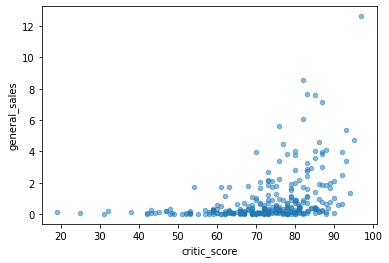

In [50]:
# Корреляция между общими продажами и оценкой критиков
print(f' Коэффициент корреляции: {data_ps4.general_sales.corr(data_ps4.critic_score)}')
data_ps4.plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.5); 

Наблюдается слабая корреляция между отзывами критиков и общими продажами. Чем выше оценка критика, тем больше продажи. 

 Коэффициент корреляции: -0.02293797593157938


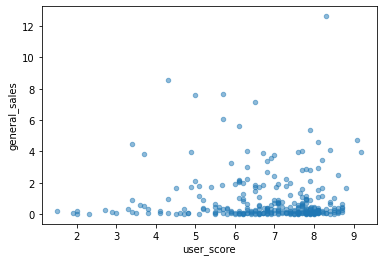

In [51]:
# Корреляция между общими продажами и оценкой пользователей
print(f' Коэффициент корреляции: {data_ps4.general_sales.corr(data_ps4.user_score)}')
data_ps4.plot(x='user_score', y='general_sales', kind='scatter', alpha=0.5);

Корреляции практически не наблюдается. Возможно, недостаточно данных, много пропусков.

Отзыв критиков больше влияет на продажи, чем отзывы пользователей.

* **Соотнесем выводы по продажам на других платформах**

 Коэффициент корреляции: 0.37518895898626164
 Коэффициент корреляции: 0.32749655500689184
 Коэффициент корреляции: 0.364366066682003
 Коэффициент корреляции: 0.3471998167863232
 Коэффициент корреляции по всем платформам: 0.30992098929684664


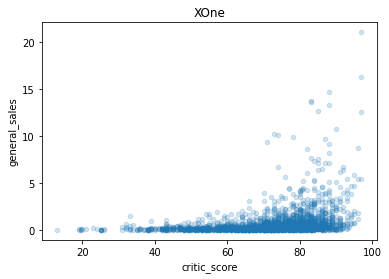

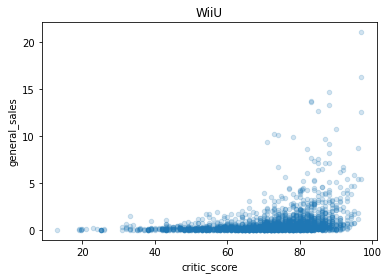

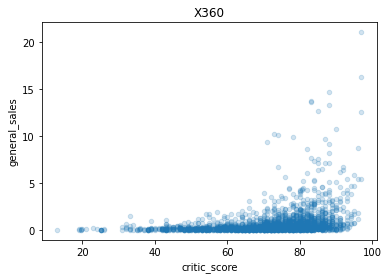

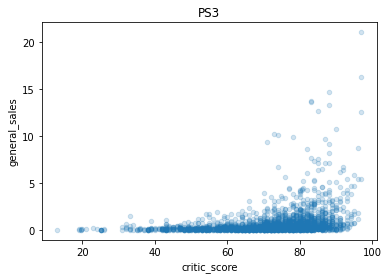

In [52]:
# Поиск корреляции  между отзывами критиков и продажами вне зависимости от платфоры
platform_actually = ['XOne', 'WiiU', 'X360', 'PS3']
for i in platform_actually:
    data_pl = data_actually[data_actually['platform'] == i]
    print(f' Коэффициент корреляции: {data_pl.general_sales.corr(data_pl.critic_score)}')
    data_actually.plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.2, title = i) 
print(f' Коэффициент корреляции по всем платформам: {data_actually.general_sales.corr(data_actually.critic_score)}')

Коэфициент корреляции между оценкой критиков и продажами не значительно отличается от платформы к платформе. Общая тенденция сохраняется и на остальных платформах. 

 Коэффициент корреляции: XOne -0.09402739254121933
 Коэффициент корреляции: WiiU 0.3668819759743242
 Коэффициент корреляции: X360 0.043753366320192104
 Коэффициент корреляции: PS3 0.02340129433189055
 Коэффициент корреляции по всем платформам: 0.04023642494300305


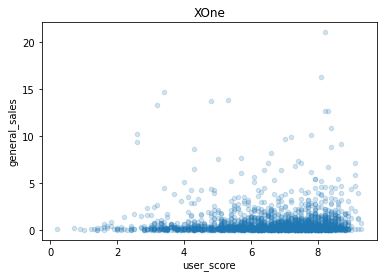

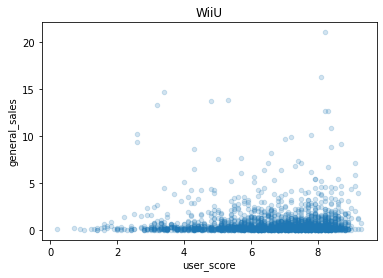

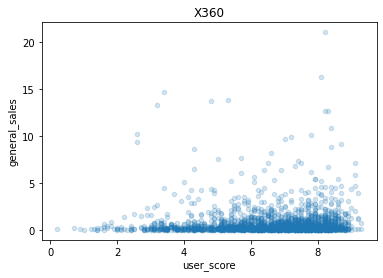

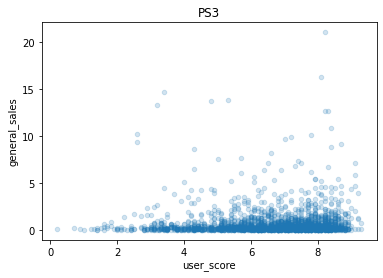

In [53]:
# Корреляция между общими продажами и оценкой пользователей на остальных платформах
platform_actually = ['XOne', 'WiiU', 'X360', 'PS3']
for i in platform_actually:
    data_pl = data_actually[data_actually['platform'] == i]
    print(f' Коэффициент корреляции: {i} {data_pl.general_sales.corr(data_pl.user_score)}')
    data_actually.plot(x='user_score', y='general_sales', kind='scatter', alpha=0.2, title = i) 
print(f' Коэффициент корреляции по всем платформам: {data_actually.general_sales.corr(data_actually.user_score)}')

Коэффициент корреляции между продажами и оценкой пользователя различается от платформы к платформе. Для таких платформ как WiiU наблюдается слабая корреляция, а для XOne и PS4 корреляции практически не наблюдается. Мы знаем, что в колонке с оценкой пользователей было значение tbd, возможно для некоторых платформ оценка пользователей только ожидается и поэтому коэффициенты корреляции различаются от платформы к платформе. 

## Распределение игр по жанрам

Поскольку одна и таже игра может повторяться для разных платформфах и для нее будет один и тот же жанр, то будем работать только с уникальными названиями игр, что бы жанр одной и тойже игры не повторялся. 

Будем сравнивать медианное значение продаж. 

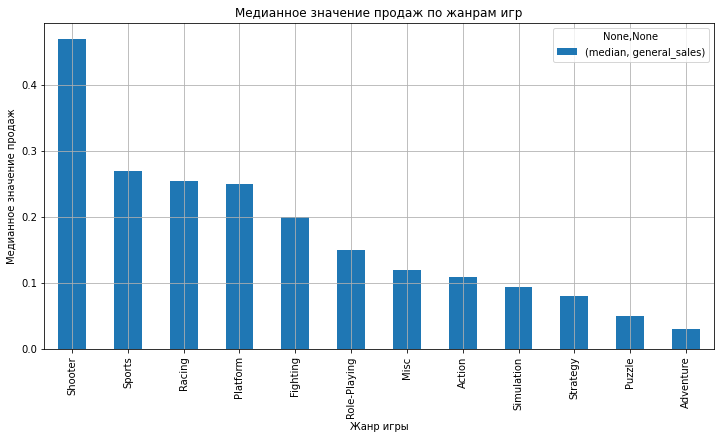

In [54]:
data_name_actually = data_name_unique.query('2011 <= year_of_release <= 2016').copy()
(
    data_name_actually.pivot_table(index='genre',
                          values=['general_sales'] , 
                          aggfunc=['median'])
    .sort_values(by=('median','general_sales'), ascending = False)
    .plot.bar(grid=True, figsize=(12,6), title='Медианное значение продаж по жанрам игр')
);
plt.xlabel('Жанр игры', fontsize = 10)
plt.ylabel('Медианное значение продаж', fontsize = 10)
plt.show()

По количеству и продажам самый популярный жанр это Shooter, Sports, Racing.

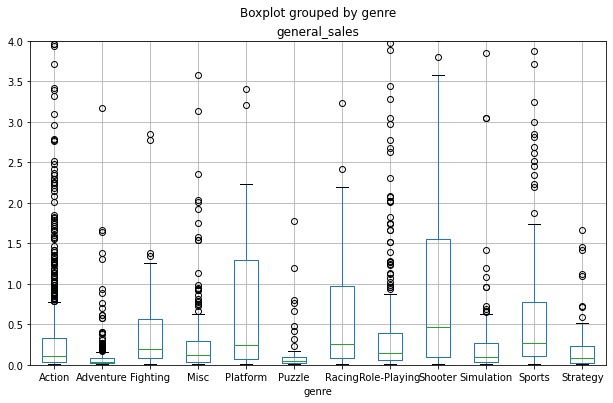

In [55]:
# построим диаграмму размаха
ax = data_name_actually.boxplot(
     by='genre', 
     column='general_sales',
     figsize=(10, 6));
ax.set_ylim(0, 4);

Медианное значение продаж превышает для жанра игр Shooter, затем Platform, RacingRole-playing. Количество проданных копий игр с этими жанрами превышает все остальные жанры, несмотря на то, что медианные значение распределены по-другому.

# Портрет пользователя каждого региона 

##  Популярные платформы

In [56]:
# Находим топ-5 платформ для каждого региона
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    data_name_actually_region = (
        data_name_actually
        .pivot_table(index='platform', values = i, aggfunc='mean')
        .sort_values(by=i, ascending=False)
    )
    data_name_actually_region['proportion_of_sales'] = (
        data_name_actually_region[i] / data_name_actually_region[i].sum()
    ) * 100 
    data_name_actually_region['proportion_of_sales'] = (
        data_name_actually_region['proportion_of_sales']
        .apply(lambda x: '{:.2f}%'.format(x))
    )
    display(data_name_actually_region.head())

,na_sales,proportion_of_sales
platform,,
X360,0.66,22.91%
XOne,0.57,19.76%
WiiU,0.41,14.50%
Wii,0.33,11.43%
PS4,0.30,10.33%


,eu_sales,proportion_of_sales
platform,,
PS4,0.39,19.24%
XOne,0.31,15.09%
WiiU,0.27,13.14%
X360,0.26,13.05%
PS3,0.25,12.25%


,jp_sales,proportion_of_sales
platform,,
3DS,0.23,27.00%
WiiU,0.18,21.84%
PS3,0.10,11.30%
PSP,0.08,9.11%
Wii,0.07,8.67%


Платформы, которые мы определили ранеее в список популярных и перспективных начали выпускаться с 2012 года. Можно посмотреть топ-5 популярных платформ по регионам именно в промежуток выхода новых платформ 2012-2016. 

In [57]:
# Находим топ-5 платформ для каждого региона с 2012-2016 год
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    data_name_actually_region = (
        data_name_actually
        .query('2012 <= year_of_release <= 2016')
        .pivot_table(index='platform', values = i, aggfunc='mean')
        .sort_values(by=i, ascending=False)
    )
    data_name_actually_region['proportion_of_sales'] = (
        data_name_actually_region[i] / data_name_actually_region[i].sum()
    ) * 100 
    data_name_actually_region['proportion_of_sales'] = (
        data_name_actually_region['proportion_of_sales']
        .apply(lambda x: '{:.2f}%'.format(x))
    )
    data_name_actually_region.head()

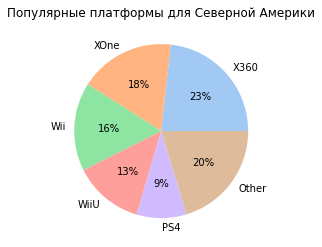

In [58]:
# Популярные платформы для Северной Америки
df = [23.25, 17.73, 16.45, 13.02, 9.27, 20.28]
labels = ['X360', 'XOne', 'Wii', 'WiiU', 'PS4', 'Other']
colors = sns.color_palette('pastel')[0:6]
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Популярные платформы для Северной Америки")
plt.show()

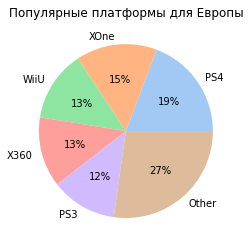

In [59]:
# Популярные платформы для Европы
df = [19.24, 15.09, 13.14, 13.05, 12.25, 27.23]
labels = ['PS4', 'XOne', 'WiiU', 'X360', 'PS3', 'Other']
colors = sns.color_palette('pastel')[0:6]
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Популярные платформы для Европы")
plt.show()

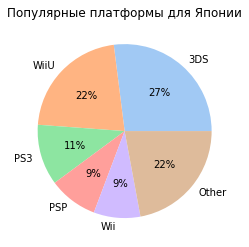

In [60]:
# Популярные платформы для Японии
df = [27, 21.84, 11.30, 9.11, 8.67, 22.08]
labels = ['3DS', 'WiiU', 'PS3', 'PSP', 'Wii', 'Other']
colors = sns.color_palette('pastel')[0:6]
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Популярные платформы для Японии")
plt.show()

**Находим топ-5 жанров игр по регионам**

/var/folders/vf/z1gk_tyn2zsf73w6bspmxgjm0000gn/T/ipykernel_38278/1723385299.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_5 = df_top_5.append(new_row, ignore_index=False).copy()


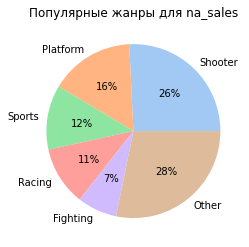

,na_sales,proportion_of_sales
genre,,
Shooter,0.72,25.76
Platform,0.44,15.70
Sports,0.33,11.97
Racing,0.31,10.99
Fighting,0.21,7.38
Other,0,28.20


/var/folders/vf/z1gk_tyn2zsf73w6bspmxgjm0000gn/T/ipykernel_38278/1723385299.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_5 = df_top_5.append(new_row, ignore_index=False).copy()


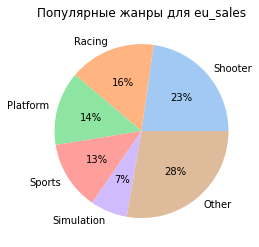

,eu_sales,proportion_of_sales
genre,,
Shooter,0.55,22.76
Racing,0.38,16.04
Platform,0.33,13.76
Sports,0.31,12.85
Simulation,0.16,6.87
Other,0,27.72


/var/folders/vf/z1gk_tyn2zsf73w6bspmxgjm0000gn/T/ipykernel_38278/1723385299.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_5 = df_top_5.append(new_row, ignore_index=False).copy()


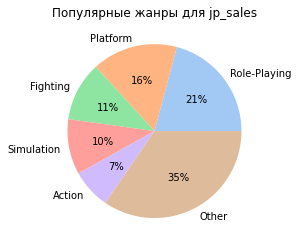

,jp_sales,proportion_of_sales
genre,,
Role-Playing,0.22,20.86
Platform,0.17,15.93
Fighting,0.12,11.02
Simulation,0.11,10.30
Action,0.08,7.33
Other,0,34.56


In [61]:
# Находим топ-5 жанров игр для каждого региона 2011-2016 год
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    data_name_actually_genre = (
        data_name_actually
        .pivot_table(index='genre', values = i, aggfunc='mean')
        .sort_values(by=i, ascending=False)
    )
    data_name_actually_genre['proportion_of_sales'] = (
        data_name_actually_genre[i] / data_name_actually_genre[i].sum()
    ) * 100 
    data_name_actually_genre['proportion_of_sales'] = (
        data_name_actually_genre['proportion_of_sales']
        .apply(lambda x: float('{:.2f}'.format(x)))
    )
    
    df_top_5 = data_name_actually_genre.head().copy()
    other_sum = 100 - df_top_5['proportion_of_sales'].sum()
    new_row = pd.Series(data={i:'0', 'proportion_of_sales': other_sum}, name='Other')
    df_top_5 = df_top_5.append(new_row, ignore_index=False).copy()
    
    df = df_top_5['proportion_of_sales'].values
    labels = df_top_5.index
    colors = sns.color_palette('pastel')[0:6]
    plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title(f'Популярные жанры для {i}')
    plt.show()                    
    display(df_top_5.head(6))

## Влияние рейтинга ESRB на продажи в отдельном регионе

In [62]:
print(data_name_actually.rating.value_counts())
print('Всего пропусков', data_name_actually.rating.isna().sum())
print('Доля пропусков', data_name_actually.rating.isna().sum()/len(data_name_actually))

unknown    1205
T           351
E           317
M           262
E10+        201
EC            1
RP            1
Name: rating, dtype: int64
Всего пропусков 0
Доля пропусков 0.0


In [63]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    data_name_actually_genre = (
        data_name_actually
        .pivot_table(index='rating', values = i, aggfunc='sum')
        .sort_values(by=i, ascending=False)
    )
    display(data_name_actually_genre)


,na_sales
rating,
M,159.69
E,110.90
T,72.97
unknown,69.22
E10+,65.65
EC,0.42
RP,0.00


,eu_sales
rating,
M,132.10
E,96.32
unknown,67.75
T,60.44
E10+,41.53
RP,0.03
EC,0.00


,jp_sales
rating,
unknown,115.69
E,34.31
T,27.36
M,19.16
E10+,10.41
EC,0.00
RP,0.00


Больше всего игр продается с рейтенгом (М) для взрослых, для всех (E), для подростков (T). В Японии свой рейтинг.

## Проверка гипотез
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

* Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны
* Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC  не равны
    

In [64]:
sample_1 = (
    data_actually
    .query('platform == "PC" & ~user_score.isna()', engine='python')['user_score']
)
sample_2 = (data_actually
            .query('platform == "XOne" & ~user_score.isna()', engine='python')['user_score']
           )
alpha = .05
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.2759272782775782
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность допустить ошибку первого рода состаляет 27,6%. Вероятность совершить ошибку первого рода достаточно большая, поэтому мы не можем отвергнуть нулевую гипотезу.

In [65]:
# средний пользовательский рейтинг по платформам Xbox One и PC:
average_user_score_PC = (
    data_actually
    .query('platform == "PC" & ~user_score.isna()', engine='python')['user_score']
    .mean()
)
average_user_score_XOne = (data_actually
            .query('platform == "XOne" & ~user_score.isna()', engine='python')['user_score']
            .mean()
                          )
print('Средняя оценка пользовательского рейттинга платформы PC:', average_user_score_PC,
      'Средняя оценка пользовательского рейттинга платформы Xbox One:', average_user_score_XOne, sep='\n')

Средняя оценка пользовательского рейттинга платформы PC:
6.445324813631522
Средняя оценка пользовательского рейттинга платформы Xbox One:
6.594837398373981


Пользовательские рейтинги для двух платформ очень близки, поэтому мы подтверждаем, что мы не можем отвергнуть нулевую гипотезу.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


* Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны
* Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются

In [66]:
sample_1 = (
    data_actually
    .query('genre == "Action" & ~user_score.isna()', engine='python')['user_score']
)
sample_2 =(
    data_actually
    .query('genre == "Sports" & ~user_score.isna()', engine='python')['user_score']
)
alpha = .05
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.563333926213334e-28
Отвергаем нулевую гипотезу


Вероятность совершить ошибку первого рода очень маленькая, поэтому мы отвергаем нулевую гипотезу.

In [67]:
#  Средние пользовательские рейтинги жанров Action и Sports
average_user_score_action = (
    data_actually
    .query('genre == "Action" & ~user_score.isna()', engine='python')['user_score']
    .mean()
)
average_user_score_sports =(
    data_actually
    .query('genre == "Sports" & ~user_score.isna()', engine='python')['user_score']
    .mean()
)
print('Средняя оценка пользовательского рейттинга жанров Action:', average_user_score_action,
      'Средняя оценка пользовательского рейттинга жанров Sports:', average_user_score_sports, sep='\n')

Средняя оценка пользовательского рейттинга жанров Action:
6.776318261249468
Средняя оценка пользовательского рейттинга жанров Sports:
5.637109374999997


Подтверждаем, что пользовательские рейтинги жанров Action и Sports значительно различаются.

# Вывод:

1. Пик по количеству выпущенных игр пришелся на 2008 год. После 2008 года количество выпущенных игр снижается.
2. Больше всего продаж с 1980 года пришлось на следующие платформы PS2, PS, PS3, DC, Wii, X360. 
3. Среднее значение количества лет от появления платформы и до полного исчезновения  составляет 14 лет. Однако пик популярности и снижение продаж во сновном происходит за приблизительно 5 лет. С учетом этого был выбран актуальный переод для определения закономерностей, влияющих на успешность игры.
4. Наиболее прибыльной к 2016 году является платформа PS4, для нее в 2016 году общие продажи составили больше копий, чем для остальных платформ. Если считать, что время полной жизни платформы 14 лет, а пик ее пупулярнойсти приходит на 5 лет, то самыми перспективными будут платформа PS4, XOne, WiiU для них высокие продажи к 2016 году и на рынок они вышли недавно 4-5 лет назад, так же можно выделить платформу 3DS для которой продажи в 2016 году сравнимы с продажами платформ PS4, XOne, WiiU, но на рынке она уже 7 лет.
5. Отзыв критиков больше влияет на продажи, чем отзывы пользователей.
6. По количеству и продажам по всем регионам самый популярный жанр это Shooter, затем Platform, RacingRole-playing.

 Коэффициент корреляции: 0.39126521038185785


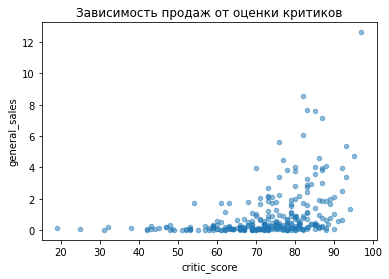

In [68]:
# Корреляция между общими продажами и оценкой критиков
print(f' Коэффициент корреляции: {data_ps4.general_sales.corr(data_ps4.critic_score)}')
data_ps4.plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.5,
              title = 'Зависимость продаж от оценки критиков'); 

Средний потрет пользователя каждого региона.

* Средний пользователь региона Северная Америка предпочитает игры на платформе Х360 и ХОne, в Европе предпочитают платформу PS4, а пользователи из Японии предпочитают платформу 3DS. 
* Самый популярный жанр игры среди пользователей в Северной Америке и Европе Shooter, в Японии Role-Playing. 
* В Северной Америке и Европе предпочитают игры с рейтингом ESRB - M(для взрослых). А в Японии игры, которые не класифицируются рейтингом ESRB.

Потенциально прибыльным продуктом в 2017 году могут являться следующие игры:
* Игры на платформах, которые вошли в топ-5 по регионам с 2012-2016 год, однако лидирующими могут стать платформы PS4, XOne, WiiU так как они недавно вышли на рынок, в отличии от остальных платформ. И PS4 и WiiU уже вошли в топ-5 по продажам в Северной Америке и Японии.
* Игры жанра Shooter , для Японии Role-Playin
* Так же стоит учесть рейтинг критиков и рейтинг ESRB. Охотнее всего покупают игры с категорией для взрослых и высоким рейтингом критиков. В Японии рейтинг ESRB не играет важную роль, большинство продоваемых игр не имеет рейтинга ESRB. 